# Data Preparation

In [1]:
# import libraries
import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ta.momentum import RSIIndicator

# historical data for Big 7 stocks
tickers = ["AAPL", "MSFT", "GOOGL", "META", "AMZN", "NVDA", "NFLX", "TSLA"]
start = '2017-12-31'
end = '2022-12-31'
today = dt.datetime.today()
adj_price_df = pd.DataFrame()
ohlcv_data = {}

In [2]:
for ticker in tickers:
    adj_price_df[ticker] = yf.download(ticker, start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
adj_price_df

,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
Date,,,,,,,,
2018-01-02,40.776524,80.391853,53.660500,181.419998,59.450500,49.317123,201.070007,21.368668
2018-01-03,40.769424,80.765984,54.576000,184.669998,60.209999,52.562878,205.050003,21.150000
2018-01-04,40.958797,81.476830,54.787998,184.330002,60.479500,52.839962,205.630005,20.974667
2018-01-05,41.425125,82.486992,55.514500,186.850006,61.457001,53.287727,209.990005,21.105333
2018-01-08,41.271267,82.571167,55.710499,188.279999,62.343498,54.920502,212.050003,22.427334
...,...,...,...,...,...,...,...,...
2022-12-23,131.299820,237.112076,89.230003,118.040001,85.250000,152.005920,294.959991,123.150002
2022-12-27,129.477585,235.354095,87.389999,116.879997,83.040001,141.159790,284.170013,109.099998
2022-12-28,125.504539,232.940552,86.019997,115.620003,81.820000,140.310074,276.880005,112.709999


# Data Exploration

In [4]:
daily_return_df = adj_price_df.pct_change()

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

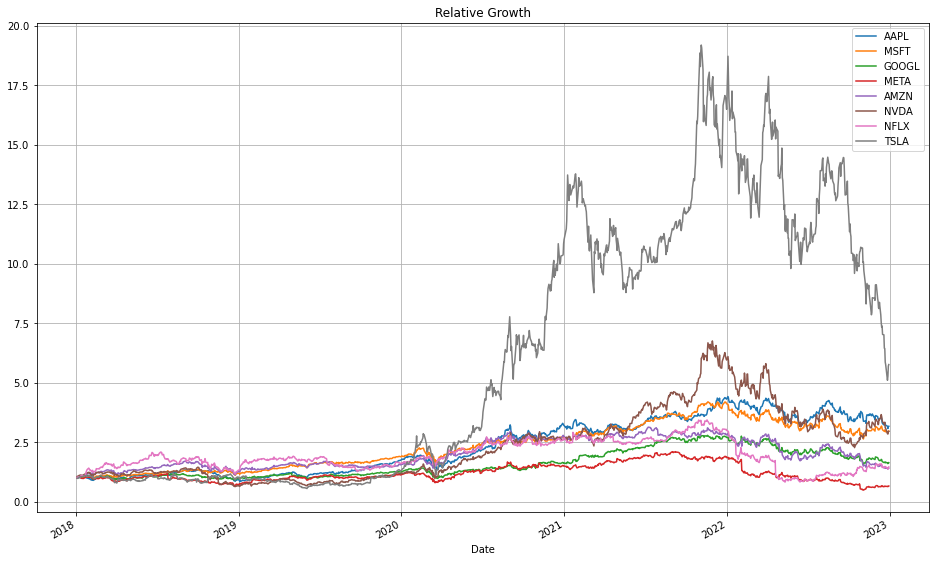

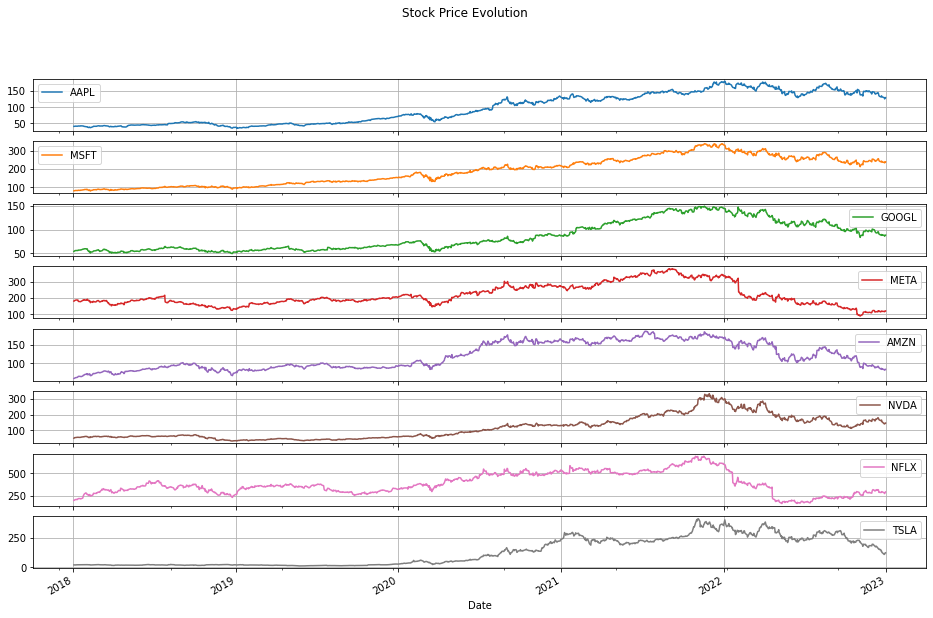

In [5]:
(1 + daily_return_df).cumprod().plot(figsize=(16, 10), title="Relative Growth", grid=True)
adj_price_df.plot(figsize=(16, 10), subplots=True, layout=(8, 1), title="Stock Price Evolution", grid =True) # Subplots of the stocks

In [6]:
daily_return_df.corr()

,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
AAPL,1.000000,0.772959,0.700822,0.584575,0.652026,0.665125,0.482989,0.466155
MSFT,0.772959,1.000000,0.808735,0.622377,0.715261,0.719510,0.533182,0.461370
GOOGL,0.700822,0.808735,1.000000,0.675031,0.682788,0.672557,0.518602,0.411227
META,0.584575,0.622377,0.675031,1.000000,0.610645,0.567400,0.525794,0.339746
AMZN,0.652026,0.715261,0.682788,0.610645,1.000000,0.646492,0.613882,0.434532
NVDA,0.665125,0.719510,0.672557,0.567400,0.646492,1.000000,0.519985,0.479659
NFLX,0.482989,0.533182,0.518602,0.525794,0.613882,0.519985,1.000000,0.381368
TSLA,0.466155,0.461370,0.411227,0.339746,0.434532,0.479659,0.381368,1.000000


# SMA Strategy

In [7]:
sma_df = pd.DataFrame()

In [8]:
print(sma_df)

Empty DataFrame
Columns: []
Index: []


In [9]:
for ticker in tickers:
    sma_df[ticker] = adj_price_df[ticker]
    sma_df[ticker + "_sma20"] = adj_price_df[ticker].rolling(window=20).mean()
    sma_df[ticker + "_sma50"] = adj_price_df[ticker].rolling(window=50).mean()
    sma_df[ticker + "_sma200"] = adj_price_df[ticker].rolling(window=200).mean()

In [10]:
sma_df.dropna(inplace=True)
sma_df

,AAPL,AAPL_sma20,AAPL_sma50,AAPL_sma200,MSFT,MSFT_sma20,MSFT_sma50,MSFT_sma200,GOOGL,GOOGL_sma20,...,NVDA_sma50,NVDA_sma200,NFLX,NFLX_sma20,NFLX_sma50,NFLX_sma200,TSLA,TSLA_sma20,TSLA_sma50,TSLA_sma200
Date,,,,,,,,,,,,,,,,,,,,,
2018-10-16,53.190136,53.323138,52.590075,45.187741,105.164909,106.378090,104.860395,93.975796,56.653999,58.331400,...,65.980038,61.193838,346.399994,359.338998,353.974798,327.55070,18.439333,18.822400,20.077240,20.861733
2018-10-17,52.960270,53.356898,52.660965,45.248660,104.890152,106.331192,104.902980,94.098288,56.379501,58.214700,...,65.911886,61.248443,364.700012,359.225999,354.232198,328.36885,18.118668,18.731600,19.933520,20.845483
2018-10-18,51.722408,53.308891,52.706430,45.303425,102.796333,106.091019,104.892175,94.208440,54.895500,57.980550,...,65.818956,61.282445,346.709991,358.293500,354.214199,329.07715,17.594000,18.616867,19.791613,20.827703
2018-10-19,52.510136,53.328644,52.759872,45.361182,102.947929,105.825739,104.881004,94.315795,55.258999,57.813200,...,65.684384,61.302223,332.670013,356.867500,353.880399,329.71235,17.333332,18.486533,19.668347,20.809497
2018-10-22,52.830986,53.326968,52.822699,45.418211,103.866913,105.586986,104.900858,94.422695,55.568501,57.642725,...,65.568246,61.322303,329.540009,354.864001,353.553799,330.31010,17.396667,18.357433,19.542293,20.790953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.299820,140.063426,143.446966,151.122855,237.112076,245.494886,238.714057,259.043897,89.230003,94.038001,...,151.068546,171.710134,294.959991,303.174500,288.902801,250.08970,123.150002,165.201000,187.790000,255.097317
2022-12-27,129.477585,139.356940,143.285240,151.003349,235.354095,245.256513,238.893677,258.839870,87.389999,93.605001,...,151.647714,171.312170,284.170013,303.324500,289.986201,249.80895,109.099998,161.510000,185.872200,254.317234
2022-12-28,125.504539,138.603654,142.963927,150.884348,232.940552,244.968478,238.847344,258.641672,86.019997,93.146500,...,152.077769,170.948414,276.880005,303.120500,290.621801,249.53830,112.709999,158.104000,183.739400,253.603501


In [11]:
for ticker in tickers:
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] > sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] > sma_df[ticker + '_sma200']), 1, 0)
    sma_df[ticker + '_position'] = np.where((sma_df[ticker + '_sma20'] < sma_df[ticker + '_sma50']) & (sma_df[ticker + '_sma50'] < sma_df[ticker + '_sma200']), -1, sma_df[ticker + '_position'])

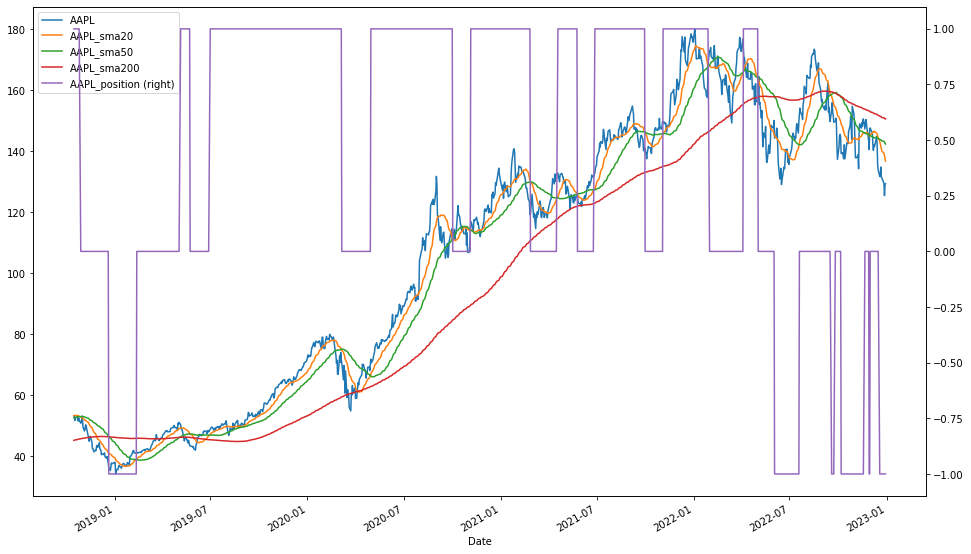

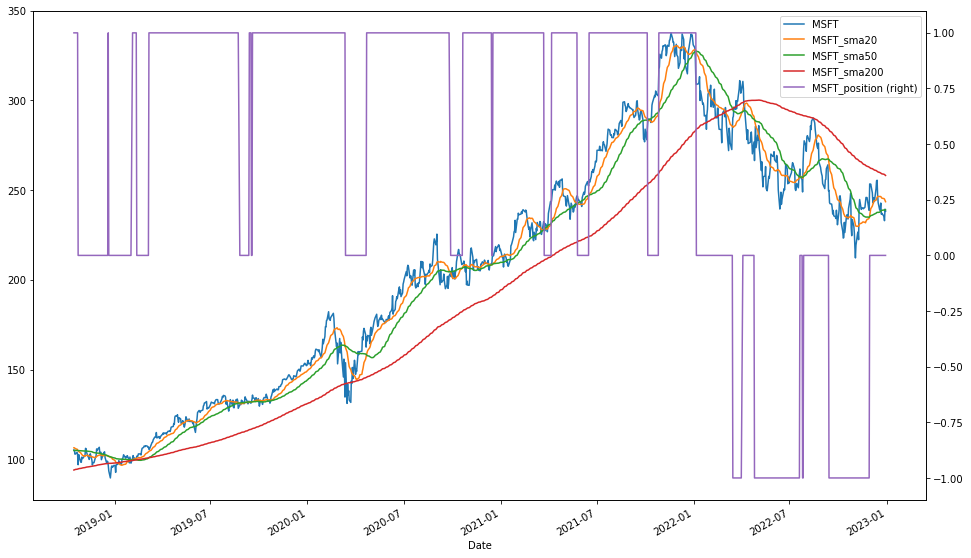

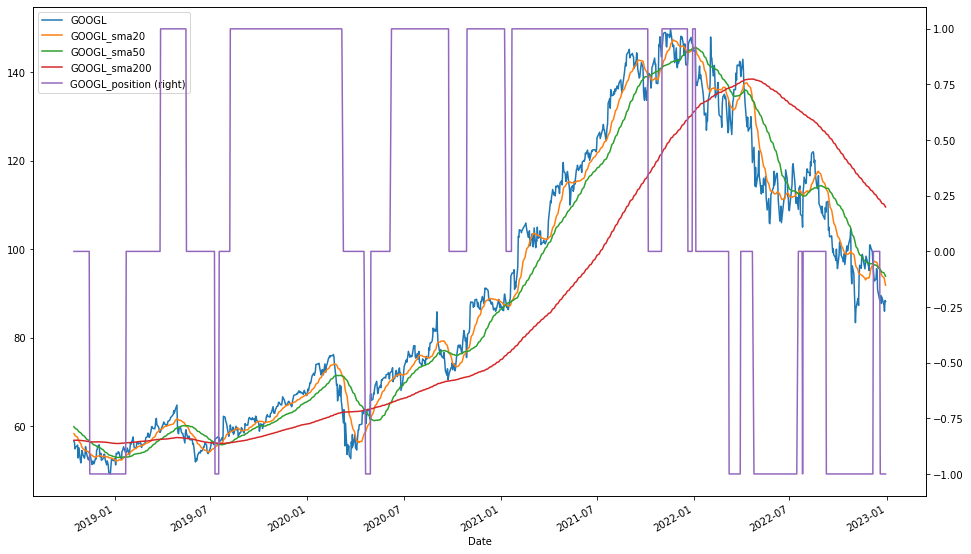

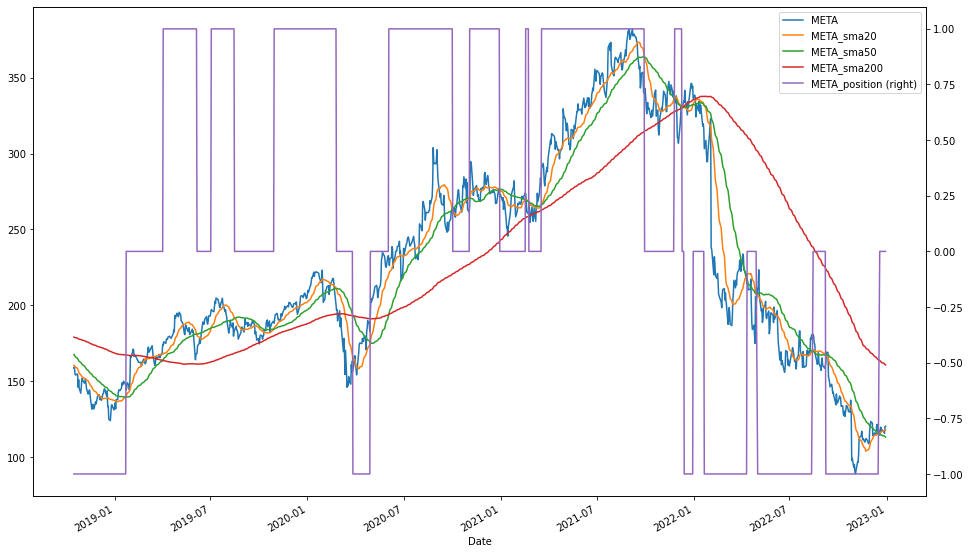

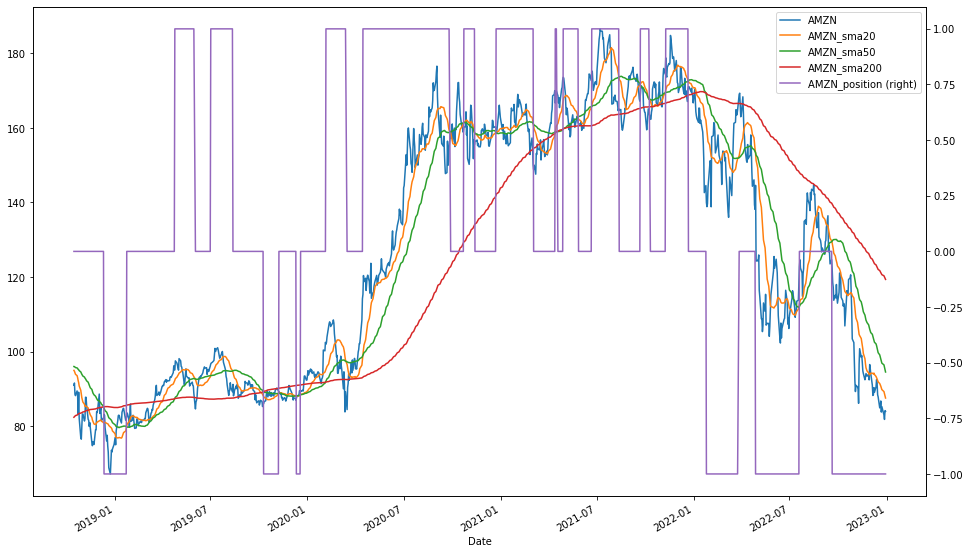

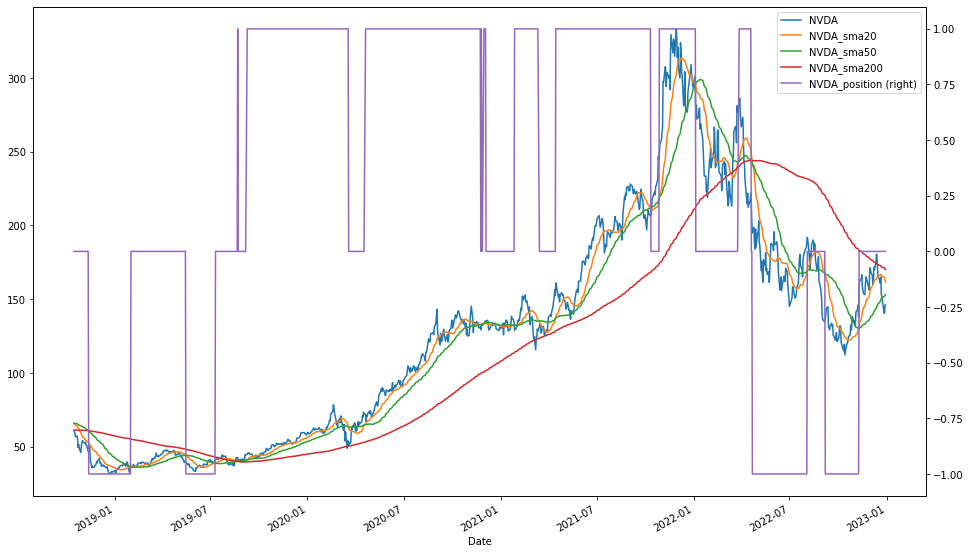

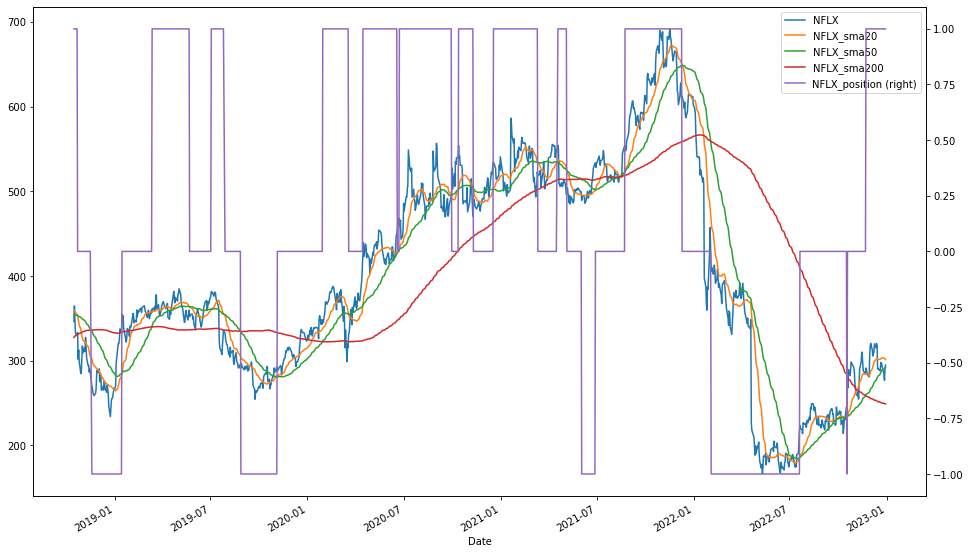

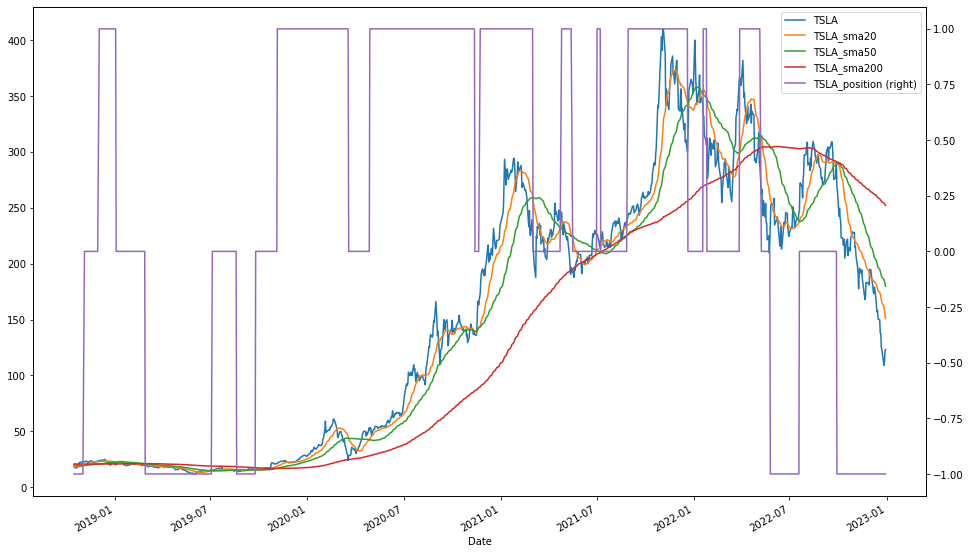

In [12]:
#시각화
for ticker in tickers:
    ax = sma_df[[ticker, ticker + '_sma20', ticker + '_sma50', ticker + '_sma200', ticker + '_position']].plot(figsize=(16, 10), secondary_y=(ticker + '_position'))
    ax.get_legend();

# RSI STRATEGY

In [13]:
rsi_df = pd.DataFrame()


<RSI 기본 포지션 종료 로직>
- 중립 구간 설정: 포지션을 열 때 사용된 임계값(ex: 30과 70)과는 다른, 중립적인 임계값을 설정하여 이 구간에 들어오면 포지션을 종료
- 예를 들어, 공매수 포지션(30 이하에서 시작)은 RSI가 5055 사이에 들어오면 종료하고, 공매도 포지션(70 이상에서 시작)은 RSI가 4550 사이에 들어오면 종료

In [14]:
for ticker in tickers:
    # RSI 계산
    rsi = RSIIndicator(adj_price_df[ticker]).rsi()
    
    # 트레이딩 신호 생성
    long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 공매수 신호
    short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 공매도 신호

    # 포지션 종료 신호 생성
    exit_long_signal = np.where((rsi >= 50) & (rsi <= 55), -1, 0)  # 공매수 포지션 종료 신호
    exit_short_signal = np.where((rsi <= 50) & (rsi >= 45), 1, 0)  # 공매도 포지션 종료 신호

    # 최종 포지션 결정
    position = long_signal + short_signal
    position = np.where((position == 0) & (exit_long_signal == -1), 0, position)  # 공매수 포지션 종료
    position = np.where((position == 0) & (exit_short_signal == 1), 0, position)  # 공매도 포지션 종료

    # 결과 저장
    rsi_df[ticker + '_RSI'] = rsi
    rsi_df[ticker + '_position'] = position



In [ ]:
# # 원본 데이터프레임을 백업 rsi 심화로직에서 쓸 df 미리 백업
# rsi_df_backup = rsi_df.copy()

In [15]:
rsi_df


,AAPL_RSI,AAPL_position,MSFT_RSI,MSFT_position,GOOGL_RSI,GOOGL_position,META_RSI,META_position,AMZN_RSI,AMZN_position,NVDA_RSI,NVDA_position,NFLX_RSI,NFLX_position,TSLA_RSI,TSLA_position
Date,,,,,,,,,,,,,,,,
2018-01-02,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2018-01-03,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2018-01-04,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2018-01-05,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
2018-01-08,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,35.694656,0,44.140496,0,40.009451,0,52.010119,0,38.027561,0,42.515513,0,49.090684,0,19.819923,1
2022-12-27,33.675331,0,42.575144,0,36.714162,0,50.473977,0,34.876981,0,35.994763,0,43.265590,0,16.564126,1
2022-12-28,29.726644,1,40.454036,0,34.439705,0,48.788379,0,33.239777,0,35.534941,0,39.827050,0,20.191722,1


In [16]:
# 각 종목별 RSI 컬럼에 대해 첫 번째 결측값이 없는 인덱스 찾기
first_valid_indices = {}
for ticker in tickers:
    first_valid_indices[ticker] = rsi_df[ticker + '_RSI'].first_valid_index()

first_valid_indices

{'AAPL': Timestamp('2018-01-22 00:00:00'),
 'MSFT': Timestamp('2018-01-22 00:00:00'),
 'GOOGL': Timestamp('2018-01-22 00:00:00'),
 'META': Timestamp('2018-01-22 00:00:00'),
 'AMZN': Timestamp('2018-01-22 00:00:00'),
 'NVDA': Timestamp('2018-01-22 00:00:00'),
 'NFLX': Timestamp('2018-01-22 00:00:00'),
 'TSLA': Timestamp('2018-01-22 00:00:00')}

In [17]:
# 2018년 1월 22일 이후 데이터에서 결측값 확인.
missing_values_after_date = rsi_df.loc['2018-01-22':].isna().any()
missing_values_after_date


AAPL_RSI          False
AAPL_position     False
MSFT_RSI          False
MSFT_position     False
GOOGL_RSI         False
GOOGL_position    False
META_RSI          False
META_position     False
AMZN_RSI          False
AMZN_position     False
NVDA_RSI          False
NVDA_position     False
NFLX_RSI          False
NFLX_position     False
TSLA_RSI          False
TSLA_position     False
dtype: bool

In [18]:
# 결측값 제거(2017-12-31 ~2018-01-21까지 약 한 달 간의 데이터는 rsi 값 제공되지 않으므로 제거)
# rsi는 결측치 문제로 2018-01-22 ~ 2022-12-31까지의 데이터로 진행 ㄱㄱ
rsi_df.dropna(inplace=True)
rsi_df
print(rsi_df.to_string())

             AAPL_RSI  AAPL_position   MSFT_RSI  MSFT_position  GOOGL_RSI  GOOGL_position   META_RSI  META_position   AMZN_RSI  AMZN_position   NVDA_RSI  NVDA_position   NFLX_RSI  NFLX_position   TSLA_RSI  TSLA_position
Date                                                                                                                                                                                                                       
2018-01-22  63.442561              0  80.026943             -1  92.958749              -1  58.313005              0  91.176280             -1  88.325377             -1  82.673535             -1  79.538744             -1
2018-01-23  63.618753              0  80.923000             -1  94.032528              -1  66.248157              0  93.458443             -1  90.329049             -1  90.850822             -1  80.257673             -1
2018-01-24  46.580106              0  79.858579             -1  88.150187              -1  57.898294              0  89.

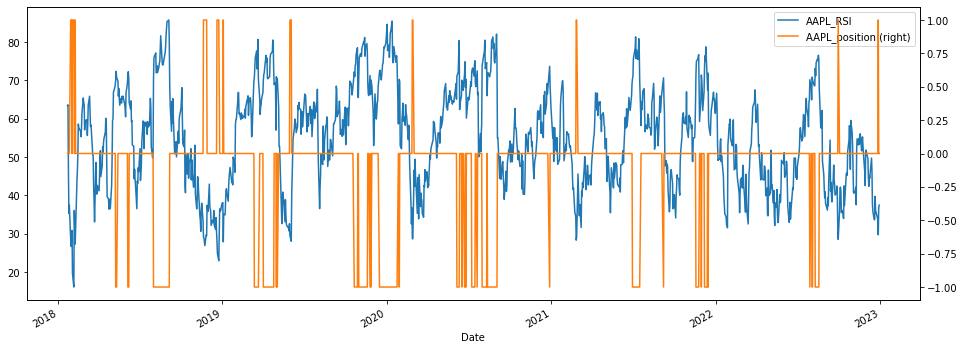

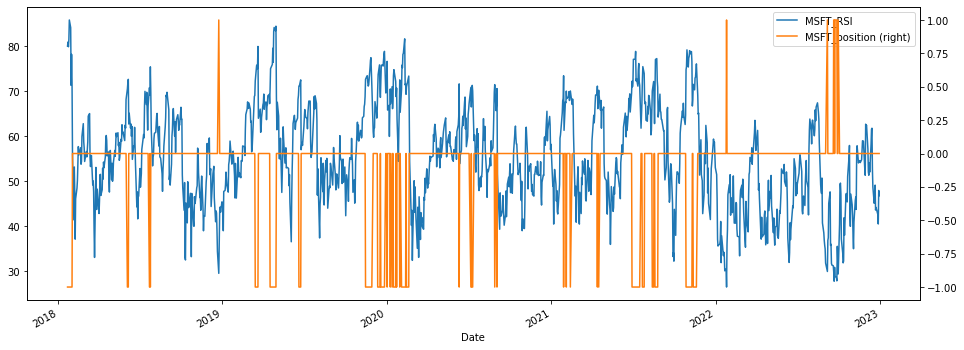

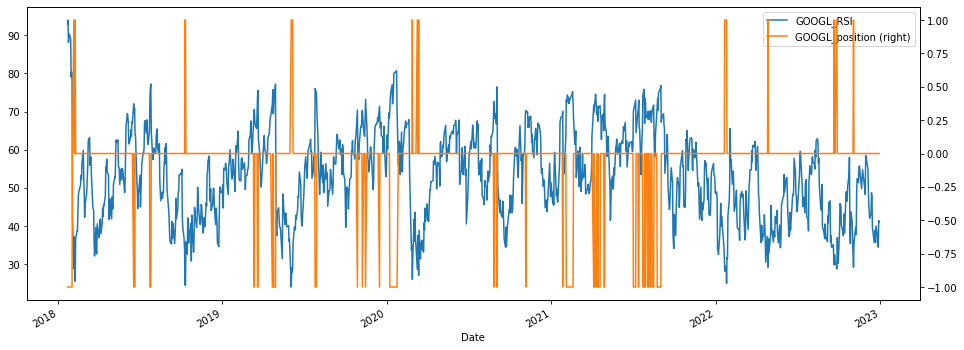

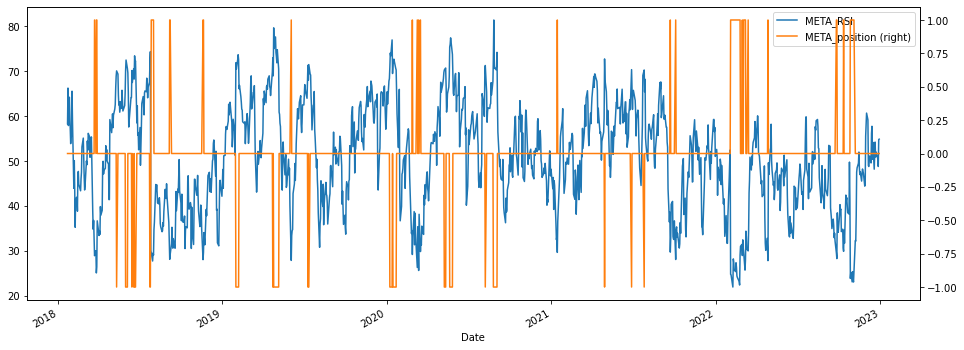

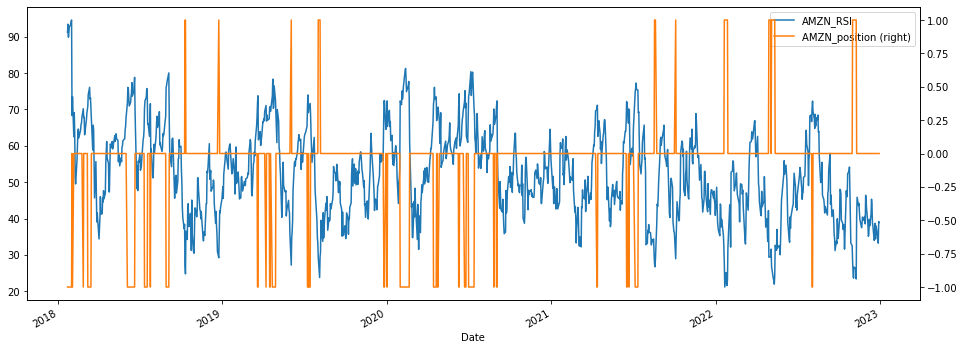

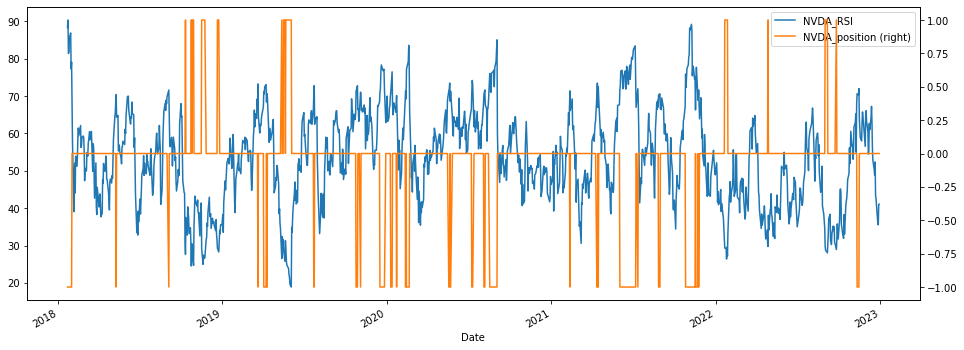

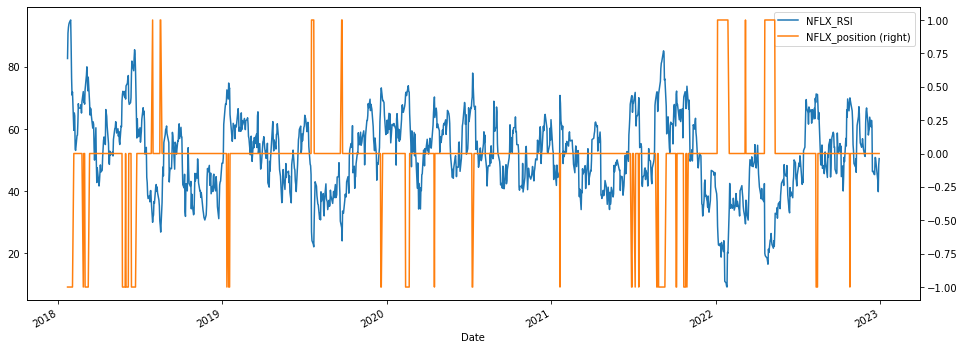

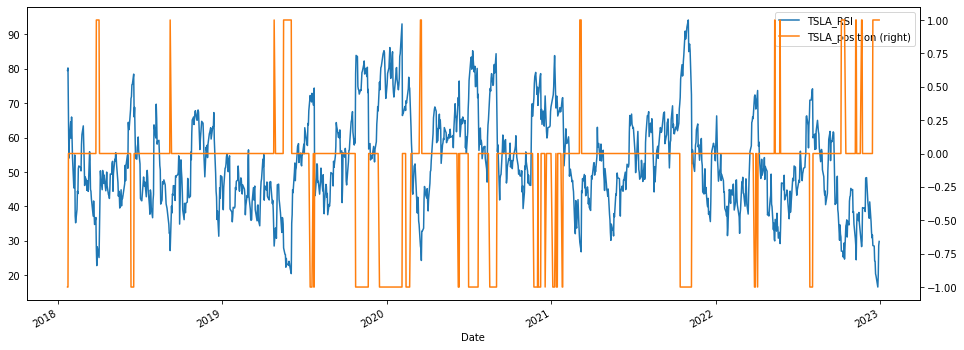

In [19]:
# 시각화
for ticker in tickers:
    ax = rsi_df[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
    ax.get_legend()


< RSI 심화 로직: 다이버전스 개념 적용>
- 주가 움직임 간의 반대 방향 움직임인 다이버전스를 감지하여 포지션 진입 시기를 결정
  (단순히 30,70 도달했다고 포지션 진입X, 다이버전스 발생 시에만 포지션 진입)
- 포지션 종료 시기는 공매도 시 rsi가 30에 진입하면 포지션 종료, 반대로 공매수 시에는 rsi가 70진입하면 포지션 종료로 변경
- 다이버전스는 RSI가 상승하면서 주가가 하락하거나, RSI가 하락하면서 주가가 상승할 때 나타남. 
- 주가가 하락하락하였음에도 이전 하락지점보다 RSI가 더 큰 경우 상승 추세로의 전환을 의미(상승 다이버전스)
- 반대로 주가 상승하였음에도 이전 상승지점보다 RSI가 더 작은 경우 하락 추세로의 전환을 의미(하락 다이버전스) 

In [ ]:
# # 위의 기본 로직 적용 시 결측치 제거했더니 ValueError: Length of values (1259) does not match length of index (1246)
# # 에러 발생. 
# # 원본 데이터프레임 백업 한거로 다시 불러오자 
# rsi_df_1=rsi_df_backup
# rsi_df_1 

In [ ]:
data = pd.DataFrame()

In [ ]:
# for ticker in tickers:
#     # RSI 계산
#     rsi = RSIIndicator(adj_price_df[ticker]).rsi()
    
#     # 트레이딩 신호 생성
#     long_signal = np.where(rsi <= 30, 1, 0)  # 과매도 구간에서 매수 신호
#     short_signal = np.where(rsi >= 70, -1, 0)  # 과매수 구간에서 매도 신호

#     # 포지션 종료 신호 생성
#     exit_long_signal = np.where((rsi >= 25) & (rsi <= 30), -1, 0)  # 매수 포지션 종료 신호
#     exit_short_signal = np.where((rsi <= 75) & (rsi >= 70), 1, 0)  # 매도 포지션 종료 신호

#     # 다이버전스 검출 로직 추가
#     bullish_divergence_signal = np.where(
#         (rsi < 30) & (rsi > 25) & (rsi > rsi.shift(1)) & (adj_price_df[ticker] < adj_price_df[ticker].shift(1)),
#         1, 0
#     )  # 상승 다이버전스 신호
#     bearish_divergence_signal = np.where(
#         (rsi > 70) & (rsi < 75) & (rsi < rsi.shift(1)) & (adj_price_df[ticker] > adj_price_df[ticker].shift(1)),
#         -1, 0
#     )  # 하락 다이버전스 신호
    
#     # 최종 포지션 결정
#     position = long_signal + short_signal
#     position = np.where((position == 0) & (exit_long_signal == -1), 0, position)  # 매수 포지션 종료
#     position = np.where((position == 0) & (exit_short_signal == 1), 0, position)  # 매도 포지션 종료
#     position = position + bullish_divergence_signal + bearish_divergence_signal  # 다이버전스 신호 반영

#     # 결과 저장
#     rsi_df_1[ticker + '_RSI'] = rsi
#     rsi_df_1[ticker + '_position'] = position


In [ ]:
####

In [ ]:
# 다이버전스 탐지 함수 
def find_divergence(df):
    # 결과를 저장할 리스트 초기화
    peaks = []
    troughs = []

    # 다이버전스를 확인하기 위한 초기 값 설정
    prev_high_price = prev_low_price = df['Close'][0]
    prev_high_rsi = prev_low_rsi = df['RSI'][0]
    prev_peak_date = prev_trough_date = df.index[0]

    # 각 행마다 반복
    for index, row in df.iterrows():
        current_price = row['Close']
        current_rsi = row['RSI']
        current_date = index

        # 고점 다이버전스를 찾는 경우
        if current_price > prev_high_price and current_rsi < prev_high_rsi:
            if prev_high_rsi >= 70:  # 과매수 구간 확인
                peaks.append({'Date': prev_peak_date, 'Price': prev_high_price, 'RSI': prev_high_rsi})

        # 저점 다이버전스를 찾는 경우
        elif current_price < prev_low_price and current_rsi > prev_low_rsi:
            if prev_low_rsi =< 30:  # 과매도 구간 확인
                troughs.append({'Date': prev_trough_date, 'Price': prev_low_price, 'RSI': prev_low_rsi})

        # 이전 고점과 저점을 현재 행의 값으로 갱신
        if current_price > prev_high_price or current_rsi > prev_high_rsi:
            prev_high_price = current_price
            prev_high_rsi = current_rsi
            prev_peak_date = current_date

        if current_price < prev_low_price or current_rsi < prev_low_rsi:
            prev_low_price = current_price
            prev_low_rsi = current_rsi
            prev_trough_date = current_date

    # 결과 데이터프레임 생성
    peaks_df = pd.DataFrame(peaks)
    troughs_df = pd.DataFrame(troughs)
    
    return peaks_df, troughs_df



In [ ]:
print(peaks_df)


In [ ]:
# 데이터프레임 초기화
data = pd.DataFrame(index=adj_price_df.index)

# 각 티커별로 RSI 및 포지션 계산 후 다이버전스 탐지
for ticker in tickers:
    # RSI 계산
    df = pd.DataFrame()
    df['Close'] = adj_price_df[ticker]
    df['RSI'] = RSIIndicator(df['Close']).rsi()
    
    # 초기 포지션 값 설정
    df['position'] = 0  # 이 부분은 실제 전략에 따라 수정하세요

    # 다이버전스 탐지
    peaks_df, troughs_df = find_divergence(df)

    # 다이버전스 신호를 포지션에 반영
    for date in peaks_df['Date']:
        df.loc[date, 'position'] = max(df.loc[date, 'position'], -1)
    for date in troughs_df['Date']:
        df.loc[date, 'position'] = min(df.loc[date, 'position'], 1)

    # 결과 저장
    data[ticker + '_RSI'] = df['RSI']
    data[ticker + '_position'] = df['position']

In [ ]:
####

In [ ]:
# 그러고 나서 다시 결측치 제거 ㄱㄱ
rsi_df_1.dropna(inplace=True)
rsi_df_1
print(rsi_df_1.to_string())


In [ ]:
# 그리고 다시 시각화
for ticker in tickers:
    ax = data[[ticker + '_RSI', ticker + '_position']].plot(figsize=(16, 6), secondary_y=(ticker + '_position'))
    ax.get_legend()


In [ ]:
# 기본로직 vs 심화로직 포지션 시각화 비교 (ㅅㅂ 왜 똑같이 나오냐)
# 7행 2열의 서브플롯 생성
fig, axes = plt.subplots(nrows=len(tickers), ncols=2, figsize=(12, 4 * len(tickers)))

# 각 티커에 대해 rsi_df_1과 rsi_df의 그래프 생성
for i, ticker in enumerate(tickers):
    # rsi_df의 그래프 (첫 번째 열)ㅠ
    ax1 = axes[i, 0]
    ax1.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
    ax2 = ax1.twinx()
    ax2.plot(rsi_df.index.to_numpy(), rsi_df[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
    ax1.set_ylabel('RSI')
    ax2.set_ylabel('Position')
    ax1.set_title(f"{ticker} basic logic")
    ax1.grid(True)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    # data의 그래프 (두 번째 열)
    ax1 = axes[i, 1]
    ax1.plot(data.index.to_numpy(), data[ticker + '_RSI'].to_numpy(), label=ticker + '_RSI')
    ax2 = ax1.twinx()
    ax2.plot(data.index.to_numpy(), data[ticker + '_position'].to_numpy(), label=ticker + '_position', color='orange')
    ax1.set_ylabel('RSI')
    ax2.set_ylabel('Position')
    ax1.set_title(f"{ticker} advanced logic")
    ax1.grid(True)
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
is_same = rsi_df.equals(data)
is_same

# Bollinger Band Strategy

In [54]:
BB_df = pd.DataFrame()


# Performance Evaluation

In [20]:
#sma for performance evaluation
for ticker in tickers:
    sma_df[ticker+'_ret'] = sma_df[ticker].pct_change()
    sma_df[ticker+'_ret'] = sma_df[ticker+'_ret'] * sma_df[ticker + '_position'].shift(1)

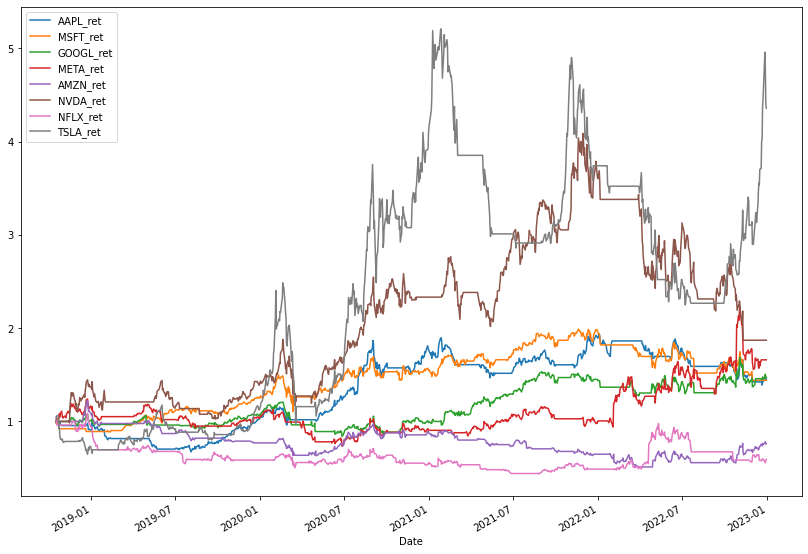

In [21]:
#sma전략 성과 시각화 
ax = (1 + sma_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

In [23]:
#rsi for performance evaluation
for ticker in tickers:
    # 주식 가격의 일일 백분율 변화를 계산합니다. 
    # 주의: 이 부분에서 'ticker' 대신 실제 주식 가격 컬럼 이름을 사용해야 합니다.
    rsi_df[ticker+'_ret'] = combined_df[ticker].pct_change()

    # 계산된 수익률을 전날의 포지션 값에 따라 조정합니다.
    rsi_df[ticker+'_ret'] = rsi_df[ticker+'_ret'] * rsi_df[ticker + '_position'].shift(1)


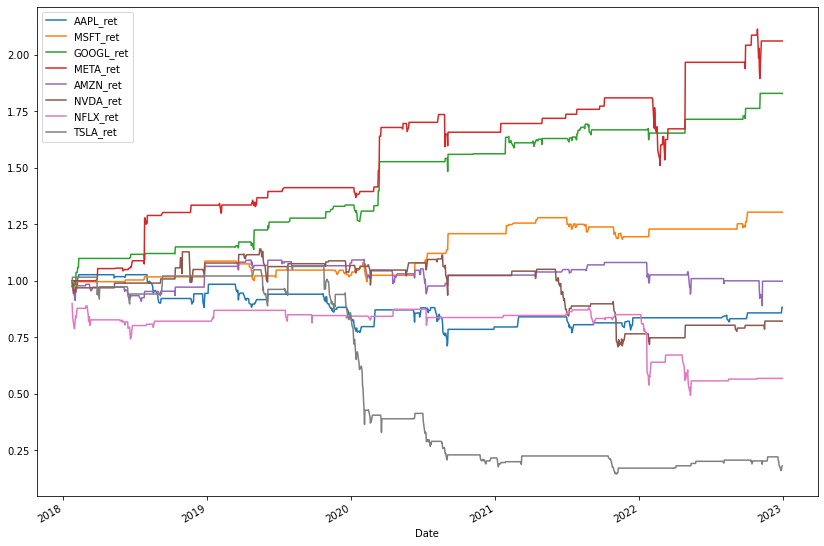

In [24]:
#rsi전략 성과 시각화 
ax = (1 + rsi_df[['AAPL_ret', 'MSFT_ret', 'GOOGL_ret', 'META_ret', 'AMZN_ret', 'NVDA_ret', 'NFLX_ret', 'TSLA_ret']]).cumprod().plot(figsize=(14, 10))
ax.get_legend()

### SMA vs Buy & Hold Strategy

In [25]:
def bnh_ratio(DF, ticker):
    "calculate relative performance of the strategy versus buy & hold strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_return_bnh'] = (1 + df['return']).cumprod()
    return df.iloc[-1]['cum_return'] / df.iloc[-1]['cum_return_bnh']

In [26]:
# sma 전략성과
for ticker in tickers:
    print("SMA performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(sma_df, ticker)))

SMA performance relative to B&H strategy on AAPL is 0.5943490015699107
SMA performance relative to B&H strategy on MSFT is 0.6365101876381577
SMA performance relative to B&H strategy on GOOGL is 0.9419310822446606
SMA performance relative to B&H strategy on META is 2.190333530817603
SMA performance relative to B&H strategy on AMZN is 0.8238017101571149
SMA performance relative to B&H strategy on NVDA is 0.7800117265204551
SMA performance relative to B&H strategy on NFLX is 0.6961762095577345
SMA performance relative to B&H strategy on TSLA is 0.6521796412599108


In [29]:
#rsi for performance evaluation
for ticker in tickers:
    # 주식 가격의 일일 백분율 변화를 계산합니다. 
    # 주의: 이 부분에서 'ticker' 대신 실제 주식 가격 컬럼 이름을 사용해야 합니다.
    rsi_df[ticker+'_ret'] = combined_df[ticker].pct_change()

    # 계산된 수익률을 전날의 포지션 값에 따라 조정합니다.
    rsi_df[ticker+'_ret'] = rsi_df[ticker+'_ret'] * rsi_df[ticker + '_position'].shift(1)

In [35]:
#rsi 전략성과 
for ticker in tickers:
    print("RSI performance relative to B&H strategy on {} is {}".format(ticker, bnh_ratio(combined_df, ticker)))

RSI performance relative to B&H strategy on AAPL is 0.28581420792898
RSI performance relative to B&H strategy on MSFT is 0.4689576918471381
RSI performance relative to B&H strategy on GOOGL is 1.2064736210607754
RSI performance relative to B&H strategy on META is 3.173563068509449
RSI performance relative to B&H strategy on AMZN is 0.7888033227882677
RSI performance relative to B&H strategy on NVDA is 0.32529484341064685
RSI performance relative to B&H strategy on NFLX is 0.43895675192131367
RSI performance relative to B&H strategy on TSLA is 0.03461240942499875


In [33]:
#rsi_df에 종가 데이터 빠져있어서 추가 
combined_df = pd.merge(rsi_df, adj_price_df, on='Date')
combined_df

,AAPL_RSI,AAPL_position,MSFT_RSI,MSFT_position,GOOGL_RSI,GOOGL_position,META_RSI,META_position,AMZN_RSI,AMZN_position,...,NFLX_ret,TSLA_ret,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,63.442561,0,80.026943,-1,92.958749,-1,58.313005,0,91.176280,-1,...,NaN,NaN,41.898552,85.685844,58.208000,185.369995,66.365501,57.812473,227.580002,23.437332
2018-01-23,63.618753,0,80.923000,-1,94.032528,-1,66.248157,0,93.458443,-1,...,-0.099789,-0.003499,41.908024,85.957085,58.808498,189.350006,68.126999,59.103859,250.289993,23.519333
2018-01-24,46.580106,0,79.858579,-1,88.150187,-1,57.898294,0,89.883987,-1,...,-0.043989,0.019558,41.240486,85.882256,58.564499,186.550003,67.875504,58.334469,261.299988,23.059334
2018-01-25,35.339198,0,81.526708,-1,89.693884,-1,59.714480,0,91.334406,-1,...,-0.032147,-0.000000,40.504303,86.359268,59.106998,187.479996,68.897499,58.470551,269.700012,22.509333
2018-01-26,37.430535,0,85.817667,-1,90.368852,-1,64.218732,0,92.669056,-1,...,-0.018168,0.000000,40.598984,87.977394,59.377998,190.000000,70.102501,60.197319,274.600006,22.856667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,35.694656,0,44.140496,0,40.009451,0,52.010119,0,38.027561,0,...,-0.000000,-0.017551,131.299820,237.112076,89.230003,118.040001,85.250000,152.005920,294.959991,123.150002
2022-12-27,33.675331,0,42.575144,0,36.714162,0,50.473977,0,34.876981,0,...,-0.000000,-0.114089,129.477585,235.354095,87.389999,116.879997,83.040001,141.159790,284.170013,109.099998
2022-12-28,29.726644,1,40.454036,0,34.439705,0,48.788379,0,33.239777,0,...,-0.000000,0.033089,125.504539,232.940552,86.019997,115.620003,81.820000,140.310074,276.880005,112.709999


In [34]:
combined_df

,AAPL_RSI,AAPL_position,MSFT_RSI,MSFT_position,GOOGL_RSI,GOOGL_position,META_RSI,META_position,AMZN_RSI,AMZN_position,...,NFLX_ret,TSLA_ret,AAPL,MSFT,GOOGL,META,AMZN,NVDA,NFLX,TSLA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,63.442561,0,80.026943,-1,92.958749,-1,58.313005,0,91.176280,-1,...,NaN,NaN,41.898552,85.685844,58.208000,185.369995,66.365501,57.812473,227.580002,23.437332
2018-01-23,63.618753,0,80.923000,-1,94.032528,-1,66.248157,0,93.458443,-1,...,-0.099789,-0.003499,41.908024,85.957085,58.808498,189.350006,68.126999,59.103859,250.289993,23.519333
2018-01-24,46.580106,0,79.858579,-1,88.150187,-1,57.898294,0,89.883987,-1,...,-0.043989,0.019558,41.240486,85.882256,58.564499,186.550003,67.875504,58.334469,261.299988,23.059334
2018-01-25,35.339198,0,81.526708,-1,89.693884,-1,59.714480,0,91.334406,-1,...,-0.032147,-0.000000,40.504303,86.359268,59.106998,187.479996,68.897499,58.470551,269.700012,22.509333
2018-01-26,37.430535,0,85.817667,-1,90.368852,-1,64.218732,0,92.669056,-1,...,-0.018168,0.000000,40.598984,87.977394,59.377998,190.000000,70.102501,60.197319,274.600006,22.856667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,35.694656,0,44.140496,0,40.009451,0,52.010119,0,38.027561,0,...,-0.000000,-0.017551,131.299820,237.112076,89.230003,118.040001,85.250000,152.005920,294.959991,123.150002
2022-12-27,33.675331,0,42.575144,0,36.714162,0,50.473977,0,34.876981,0,...,-0.000000,-0.114089,129.477585,235.354095,87.389999,116.879997,83.040001,141.159790,284.170013,109.099998
2022-12-28,29.726644,1,40.454036,0,34.439705,0,48.788379,0,33.239777,0,...,-0.000000,0.033089,125.504539,232.940552,86.019997,115.620003,81.820000,140.310074,276.880005,112.709999


### Sharpe Ratio

In [36]:
#누적 수익률 지표 
def CAGR(DF, ticker):
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    n = len(df) / 250
    CAGR = (df.iloc[-1]['cum_return']) ** (1 / n) - 1
    return CAGR

In [37]:
for ticker in tickers:
    print("CAGR of SMA strategy on {} = {}".format(ticker, CAGR(sma_df, ticker)))

CAGR of SMA strategy on AAPL = 0.0908186849817636
CAGR of SMA strategy on MSFT = 0.09010553680471634
CAGR of SMA strategy on GOOGL = 0.09457727440928632
CAGR of SMA strategy on META = 0.1269798320680764
CAGR of SMA strategy on AMZN = -0.06254484700474505
CAGR of SMA strategy on NVDA = 0.15913204188094454
CAGR of SMA strategy on NFLX = -0.11608207628310674
CAGR of SMA strategy on TSLA = 0.414965364709202


In [38]:
for ticker in tickers:
    print("CAGR of RSI strategy on {} = {}".format(ticker, CAGR(combined_df, ticker)))

CAGR of RSI strategy on AAPL = -0.024753913487334467
CAGR of RSI strategy on MSFT = 0.054642524225636535
CAGR of RSI strategy on GOOGL = 0.12875218776862862
CAGR of RSI strategy on META = 0.15607255196620806
CAGR of RSI strategy on AMZN = -0.0003207408256834521
CAGR of RSI strategy on NVDA = -0.03856618404371537
CAGR of RSI strategy on NFLX = -0.10704567314479851
CAGR of RSI strategy on TSLA = -0.28960881490664536


In [39]:
#수익률 변동성 
def volatility(DF, ticker):
    "function to calculate annualized Volatility of a trading strategy"
    df = DF.copy()
    vol = df[ticker+'_ret'].std() * np.sqrt(250)
    return vol

In [40]:
for ticker in tickers:
    print("Volatility for SMA strategy on {} = {}".format(ticker, volatility(sma_df, ticker)))

Volatility for SMA strategy on AAPL = 0.2553300019092988
Volatility for SMA strategy on MSFT = 0.25307575117908754
Volatility for SMA strategy on GOOGL = 0.24858801304067066
Volatility for SMA strategy on META = 0.3701675649465651
Volatility for SMA strategy on AMZN = 0.2997746376897314
Volatility for SMA strategy on NVDA = 0.44380623945144043
Volatility for SMA strategy on NFLX = 0.3961691603420744
Volatility for SMA strategy on TSLA = 0.5491475546671586


In [41]:
#rsi
for ticker in tickers:
    print("Volatility for RSI strategy on {} = {}".format(ticker, volatility(combined_df, ticker)))

Volatility for RSI strategy on AAPL = 0.12229468772590811
Volatility for RSI strategy on MSFT = 0.07947304150693434
Volatility for RSI strategy on GOOGL = 0.09128587199515055
Volatility for RSI strategy on META = 0.1661796262839019
Volatility for RSI strategy on AMZN = 0.12368417795455455
Volatility for RSI strategy on NVDA = 0.1657819861984849
Volatility for RSI strategy on NFLX = 0.18506621518195018
Volatility for RSI strategy on TSLA = 0.342332245276047


In [42]:
# 투자전략의 위험 대비 수익 
def sharpe(DF, ticker, rf):
    "function to calculate Sharpe Ratio of a trading strategy"
    df = DF.copy()
    return (CAGR(df, ticker) - rf) / volatility(df, ticker)

In [43]:
for ticker in tickers:
    print("Sharpe ratio for SMA strategy on {} = {}".format(ticker, sharpe(sma_df, ticker, 0.04)))

Sharpe ratio for SMA strategy on AAPL = 0.19903138918949284
Sharpe ratio for SMA strategy on MSFT = 0.19798632058296037
Sharpe ratio for SMA strategy on GOOGL = 0.21954909949884474
Sharpe ratio for SMA strategy on META = 0.23497421250463207
Sharpe ratio for SMA strategy on AMZN = -0.34207312464798845
Sharpe ratio for SMA strategy on NVDA = 0.2684325529722065
Sharpe ratio for SMA strategy on NFLX = -0.39397836052744956
Sharpe ratio for SMA strategy on TSLA = 0.6828135016215644


In [44]:
#rsi
for ticker in tickers:
    print("Sharpe ratio for RSI strategy on {} = {}".format(ticker, sharpe(combined_df, ticker, 0.04)))

Sharpe ratio for RSI strategy on AAPL = -0.5294908118369264
Sharpe ratio for RSI strategy on MSFT = 0.18424517229982845
Sharpe ratio for RSI strategy on GOOGL = 0.972244508694001
Sharpe ratio for RSI strategy on META = 0.6984764291617148
Sharpe ratio for RSI strategy on AMZN = -0.3259975648663692
Sharpe ratio for RSI strategy on NVDA = -0.4739126719693832
Sharpe ratio for RSI strategy on NFLX = -0.7945570886627185
Sharpe ratio for RSI strategy on TSLA = -0.9628330940337162


### Maximum Drawdown & Calmar Ratio

In [45]:
#최대 하락 폭
def max_dd(DF, ticker):
    "function to calculate Max Drawdown"
    df = DF.copy()
    df['return'] = df[ticker].pct_change()
    df['cum_return'] = (1 + df[ticker+'_ret']).cumprod()
    df['cum_roll_max'] = df['cum_return'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cum_return']
    return (df['drawdown'] / df['cum_roll_max']).max()
#CAGR + max drawdown 조합     
def calmar(DF, ticker):
    "function to calculate Calmar Ratio"
    df = DF.copy()
    return CAGR(df, ticker) / max_dd(df, ticker)

In [ ]:
#Calmar Ratio는 연 평균 수익과 최대 하락폭 간의 비율로, 
#투자 전략의 위험 대비 기대 수익을 나타내며, 
#높은 Calmar Ratio는 투자 전략의 높은 수익과 낮은 하락폭을 나타냄

In [46]:
#sma
for ticker in tickers:
    print("Max Drawdown of SMA on {} = {}".format(ticker, max_dd(sma_df, ticker)))
    print("Calmar Ratio of SMA on {} = {}".format(ticker, calmar(sma_df, ticker)))

Max Drawdown of SMA on AAPL = 0.3268591735459964
Calmar Ratio of SMA on AAPL = 0.27785264215319133
Max Drawdown of SMA on MSFT = 0.2752392455264344
Calmar Ratio of SMA on MSFT = 0.3273716894274165
Max Drawdown of SMA on GOOGL = 0.3057838055349394
Calmar Ratio of SMA on GOOGL = 0.30929458230736734
Max Drawdown of SMA on META = 0.4085106983965952
Calmar Ratio of SMA on META = 0.31083600152082264
Max Drawdown of SMA on AMZN = 0.5822063314361003
Calmar Ratio of SMA on AMZN = -0.10742728759144321
Max Drawdown of SMA on NVDA = 0.5422172455547509
Calmar Ratio of SMA on NVDA = 0.2934839184580602
Max Drawdown of SMA on NFLX = 0.5977732630082474
Calmar Ratio of SMA on NFLX = -0.19419081358529275
Max Drawdown of SMA on TSLA = 0.6062653853820686
Calmar Ratio of SMA on TSLA = 0.6844615818659854


In [47]:
#rsi
for ticker in tickers:
    print("Max Drawdown of RSI on {} = {}".format(ticker, max_dd(combined_df, ticker)))
    print("Calmar Ratio of RSI on {} = {}".format(ticker, calmar(combined_df, ticker)))

Max Drawdown of RSI on AAPL = 0.30620321514367826
Calmar Ratio of RSI on AAPL = -0.08084145516146624
Max Drawdown of RSI on MSFT = 0.08380207172293026
Calmar Ratio of RSI on MSFT = 0.6520426416938452
Max Drawdown of RSI on GOOGL = 0.05437030223081737
Calmar Ratio of RSI on GOOGL = 2.3680609171904
Max Drawdown of RSI on META = 0.16533478493777273
Calmar Ratio of RSI on META = 0.9439789214650098
Max Drawdown of RSI on AMZN = 0.18698327859648992
Calmar Ratio of RSI on AMZN = -0.001715344966089781
Max Drawdown of RSI on NVDA = 0.37913062720447904
Calmar Ratio of RSI on NVDA = -0.10172268151503153
Max Drawdown of RSI on NFLX = 0.4509029163065224
Calmar Ratio of RSI on NFLX = -0.2374029292638888
Max Drawdown of RSI on TSLA = 0.8632621014348075
Calmar Ratio of RSI on TSLA = -0.335481905698505


### Summary Evaluation

In [48]:
eval_df = pd.DataFrame()
eval_df.index = tickers

In [49]:
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(sma_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(sma_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(sma_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(sma_df, ticker)

In [50]:
eval_df

,bnh_ratio,sharpe_ratio,max_drawdown,calmar_ratio
AAPL,0.594349,0.199031,0.326859,0.277853
MSFT,0.636510,0.197986,0.275239,0.327372
GOOGL,0.941931,0.219549,0.305784,0.309295
META,2.190334,0.234974,0.408511,0.310836
AMZN,0.823802,-0.342073,0.582206,-0.107427
NVDA,0.780012,0.268433,0.542217,0.293484
NFLX,0.696176,-0.393978,0.597773,-0.194191
TSLA,0.652180,0.682814,0.606265,0.684462


In [52]:
#rsi
for ticker in tickers:
    eval_df.loc[ticker, 'bnh_ratio'] = bnh_ratio(combined_df, ticker)
    eval_df.loc[ticker, 'sharpe_ratio'] = sharpe(combined_df, ticker, 0.04)
    eval_df.loc[ticker, 'max_drawdown'] = max_dd(combined_df, ticker)
    eval_df.loc[ticker, 'calmar_ratio'] = calmar(combined_df, ticker)

In [53]:
#rsi
eval_df

,bnh_ratio,sharpe_ratio,max_drawdown,calmar_ratio
AAPL,0.285814,-0.529491,0.306203,-0.080841
MSFT,0.468958,0.184245,0.083802,0.652043
GOOGL,1.206474,0.972245,0.054370,2.368061
META,3.173563,0.698476,0.165335,0.943979
AMZN,0.788803,-0.325998,0.186983,-0.001715
NVDA,0.325295,-0.473913,0.379131,-0.101723
NFLX,0.438957,-0.794557,0.450903,-0.237403
TSLA,0.034612,-0.962833,0.863262,-0.335482
